In [49]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import torch 
from many_models_attention import *
from many_testing import tensorFromList, input_lang, output_lang, EOS_token, SOS_token
import numpy as np


def see_attention(input_seq, encoder, decoder):
     output, attention_weights = sample(encoder, decoder, input_seq)
     fig = plt.figure(figsize=(10,10))
     plt.xticks(fontsize=14, rotation=90)
     ax = fig.add_subplot()
     print(len(input_seq))
     print(attention_weights.shape)
     print(len(output))
     cax = ax.matshow(attention_weights.numpy(),cmap ='bone')
     ax.set_xticklabels(['<SOS>'] + input_seq + ['<EOS>'])
     ax.set_yticklabels( ['<SOS>'] + list(output) + ['<EOS>'])
     ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
     ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

def sample(encoder, decoder, regex: List[str], max_length=MAX_LENGTH):
    '''Returns an example, for the input regex'''
    NUM_EXAMPLES = 1
    with torch.no_grad():
        input_tensor = tensorFromList(input_lang, regex)
        input_length = input_tensor.size()[0]
        hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(1, input_length, encoder.hidden_size, device=device)
        encoder_hiddens = torch.zeros(1, input_length, encoder.hidden_size, device=device)



        for ei in range(input_length):
            encoder_output, hidden = encoder(input_tensor[ei], hidden)
            encoder_outputs[:,ei] = encoder_output[:, 0]
            encoder_hiddens[:,ei] = hidden[:, 0]

        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS
        out = ''
        regex_len = len(regex)+1
        weights = torch.zeros(100, regex_len)
        index = 0
        MAX_LEN = 100
        while len(out) < MAX_LEN:
            decoder_output, hidden, attn_weights = decoder(decoder_input, hidden, encoder_outputs, encoder_hiddens)
            topv, topi = decoder_output.data.topk(1)
            word = topi.item()
            #word = np.random.choice(output_lang.n_words, p = np.exp(decoder_output[0].detach().to("cpu").numpy()))
            weights[index] = attn_weights.data[0]
            if word == EOS_token:
                return (out, weights[:index+1])
            else:
                out += output_lang.index2word[word]
                index+=1
            decoder_input = torch.tensor([[word]], device = device)
        return None 


In [50]:
encoder2Local = EncoderRNN(input_lang.n_words, 256)
encoder2Local.load_state_dict(torch.load('/home/epertsev/RegexPlus-neural/neural/Results local-locationbased-2 2022-09-07 10:06:59.309423/encoder.pt'))
encoder2Local = encoder2Local.to(device=device)
decoder = SoftDecoder(256, output_lang.n_words, lambda x: Local(x, LocationBased))
decoder.load_state_dict(torch.load('/home/epertsev/RegexPlus-neural/neural/Results local-locationbased-2 2022-09-07 10:06:59.309423/decoder.pt'))
decoder = decoder.to(device=device)
decoder.eval()
encoder2Local.eval()
see_attention(['[A-Z]+', *'bookkeeper'],encoder2Local, decoder)


TypeError: 'int' object is not subscriptable

14
torch.Size([99, 15])
99


<ipython-input-14-772de7ad40d0>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['s'] + input_seq + ['<EOS>'])
<ipython-input-14-772de7ad40d0>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['s'] + list(output) + ['<EOS>'])


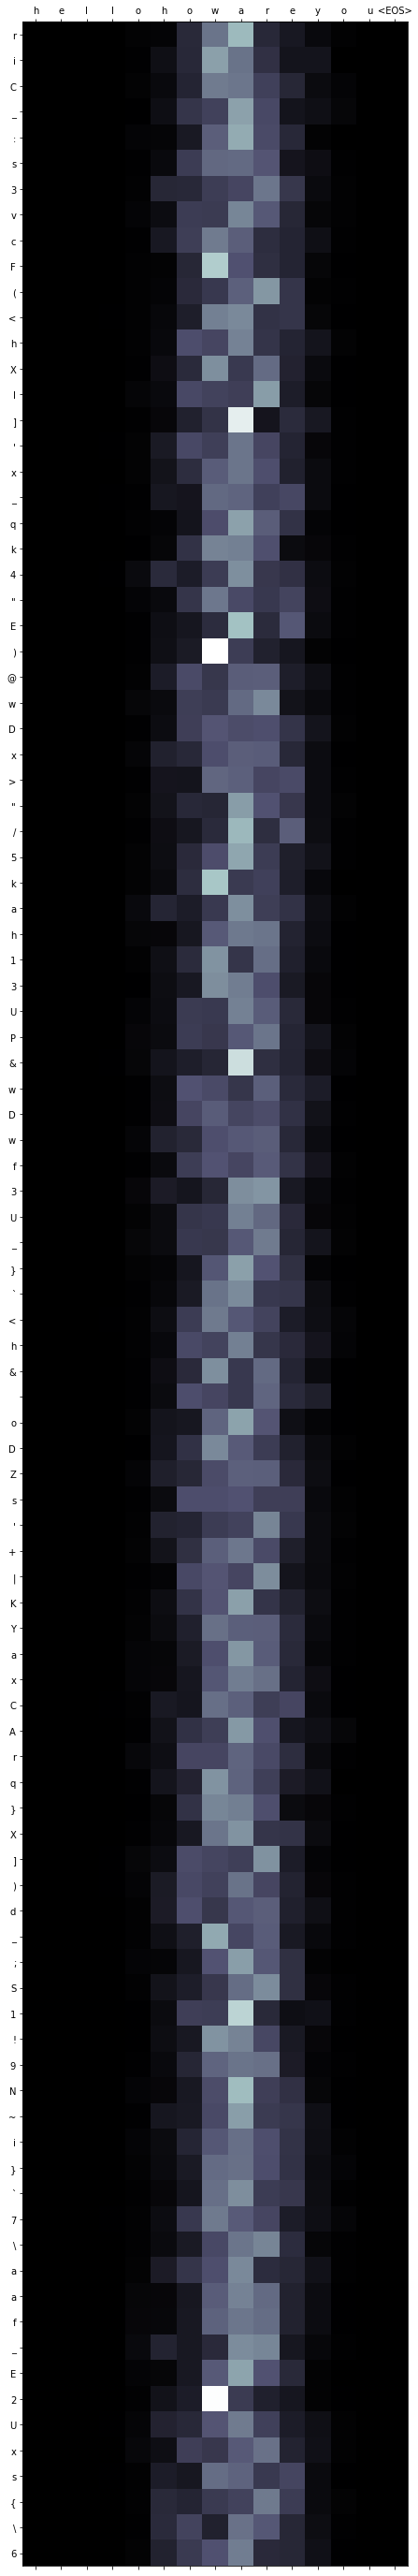

In [ ]:
see_attention([*'hellohowareyou'],encoder2Local, decoder)

In [ ]:
all_weights.keys()

In [ ]:
h = torch.load('/home/epertsev/RegexPlus-neural/neural/Results local-locationbased-2 2022-09-07 10:06:59.309423/decoder.pt')

In [ ]:
del h['attn.pos.0.bias'] 
h.keys()

In [ ]:
decoder = SoftDecoder(256, output_lang.n_words, lambda x: Local(x, LocationBased))
decoder.train(False)
decoder = decoder.to(device=device)
encoder2Local = encoder2Local.to(device=device)

In [ ]:
for k in list(h.keys()):
    if k.startswith('att') and (k!='attn_combine.weight' and k!= 'attn_combine.bias'):
        del h[k]

In [ ]:
h.keys()

In [ ]:
f = torch.load('/home/epertsev/RegexPlus-neural/neural/Results LocationBased HardDecoder 2022-09-05 17:40:28.759407/decoder.pt')

In [ ]:
f.keys()